In [1]:
import src.animation as animation
import matplotlib.pyplot as plt 
import numpy as np 
import src.fd as fd 

def getC2Gradient(f, dx):
    f_dx = 1/12*np.roll(f, 2*fd.ROLL_L) - 2/3*np.roll(f, fd.ROLL_L) + 2 / \
        3*np.roll(f, fd.ROLL_R) - 1/12*np.roll(f, 2*fd.ROLL_R)
    return f_dx/dx

def getv(phase, dx):
    return getC2Gradient(phase, dx)


0.10000000000000081


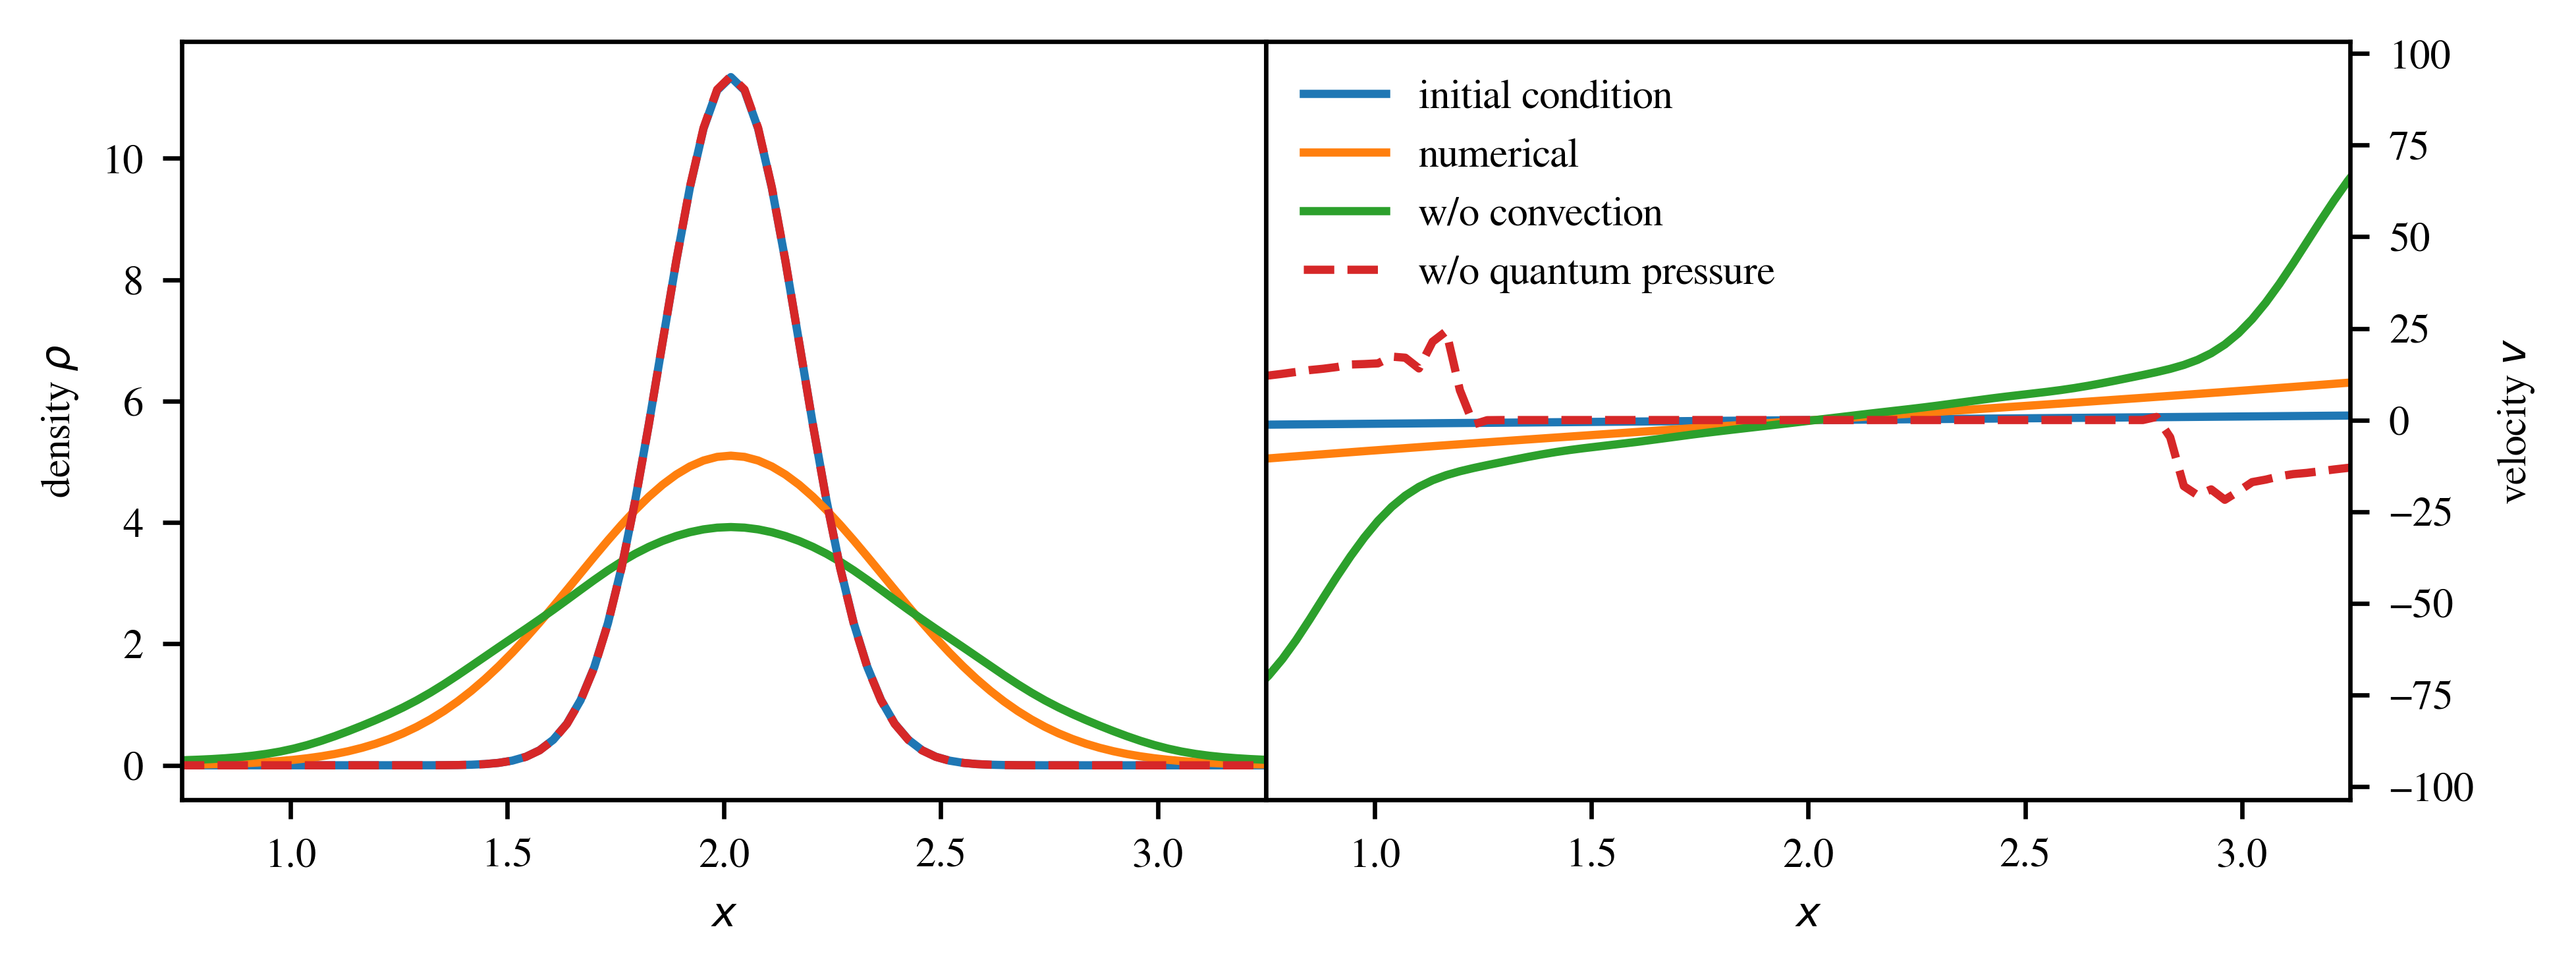

In [8]:
import matplotlib 

idx = 39
config0, psi0 , density0, phase0= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind/gaussian_wave_packet_ho-upwind__{0}.npz")
config1, psi1 , density1, phase1= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind/gaussian_wave_packet_ho-upwind__{idx}.npz")
config2, psi2 , density2, phase2= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind_without_convection/gaussian_wave_packet_ho-upwind__without_convection_{idx}.npz")
config3, psi3 , density3, phase3= animation.loadRun(
    f"runs/1d/gaussian_wave_packet_ho-upwind_without_quantum_pressure/gaussian_wave_packet_ho-upwind__without_quantum_pressure_{idx}.npz"
    )
xx = np.linspace(0, config1["domainSize"], config1["resolution"])
dx = config1["domainSize"]/config1["resolution"]
t = config1["t0"]
plt.rcParams["font.family"] = "FreeSerif"
plt.rcParams["font.size"] = 7.5

print(t)
fig, ax = plt.subplots(1, 2, figsize=(3.54 * 2, 2.54), dpi = 600)
plt.subplots_adjust(wspace=0.) 
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
plt.sca(ax[0])
plt.xticks()
plt.yticks()
plt.xlim(0.75, 3.25)
plt.plot(xx, density0[8:-8])
plt.plot(xx, density1[8:-8])
plt.plot(xx, density2[8:-8])
plt.plot(xx, density3[8:-8], ls = "dashed")
plt.xlabel("$x$")
plt.ylabel(r"density $\rho$")
plt.sca(ax[1])
plt.xticks()
plt.yticks()
plt.xlim(0.75, 3.25)
plt.plot(xx, getv(phase0, dx)[8:-8], label = "initial condition")
plt.plot(xx, getv(phase1, dx)[8:-8], label = "numerical")
plt.plot(xx, getv(phase2, dx)[8:-8], label = "w/o convection")
plt.plot(xx, getv(phase3, dx)[8:-8], label = "w/o quantum pressure", ls = "dashed")
plt.xlabel("$x$")
plt.ylabel("velocity $v$")
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.savefig("figures/standing_gaussian.pdf", bbox_inches='tight')

0.0025249999999999834 0.005 1


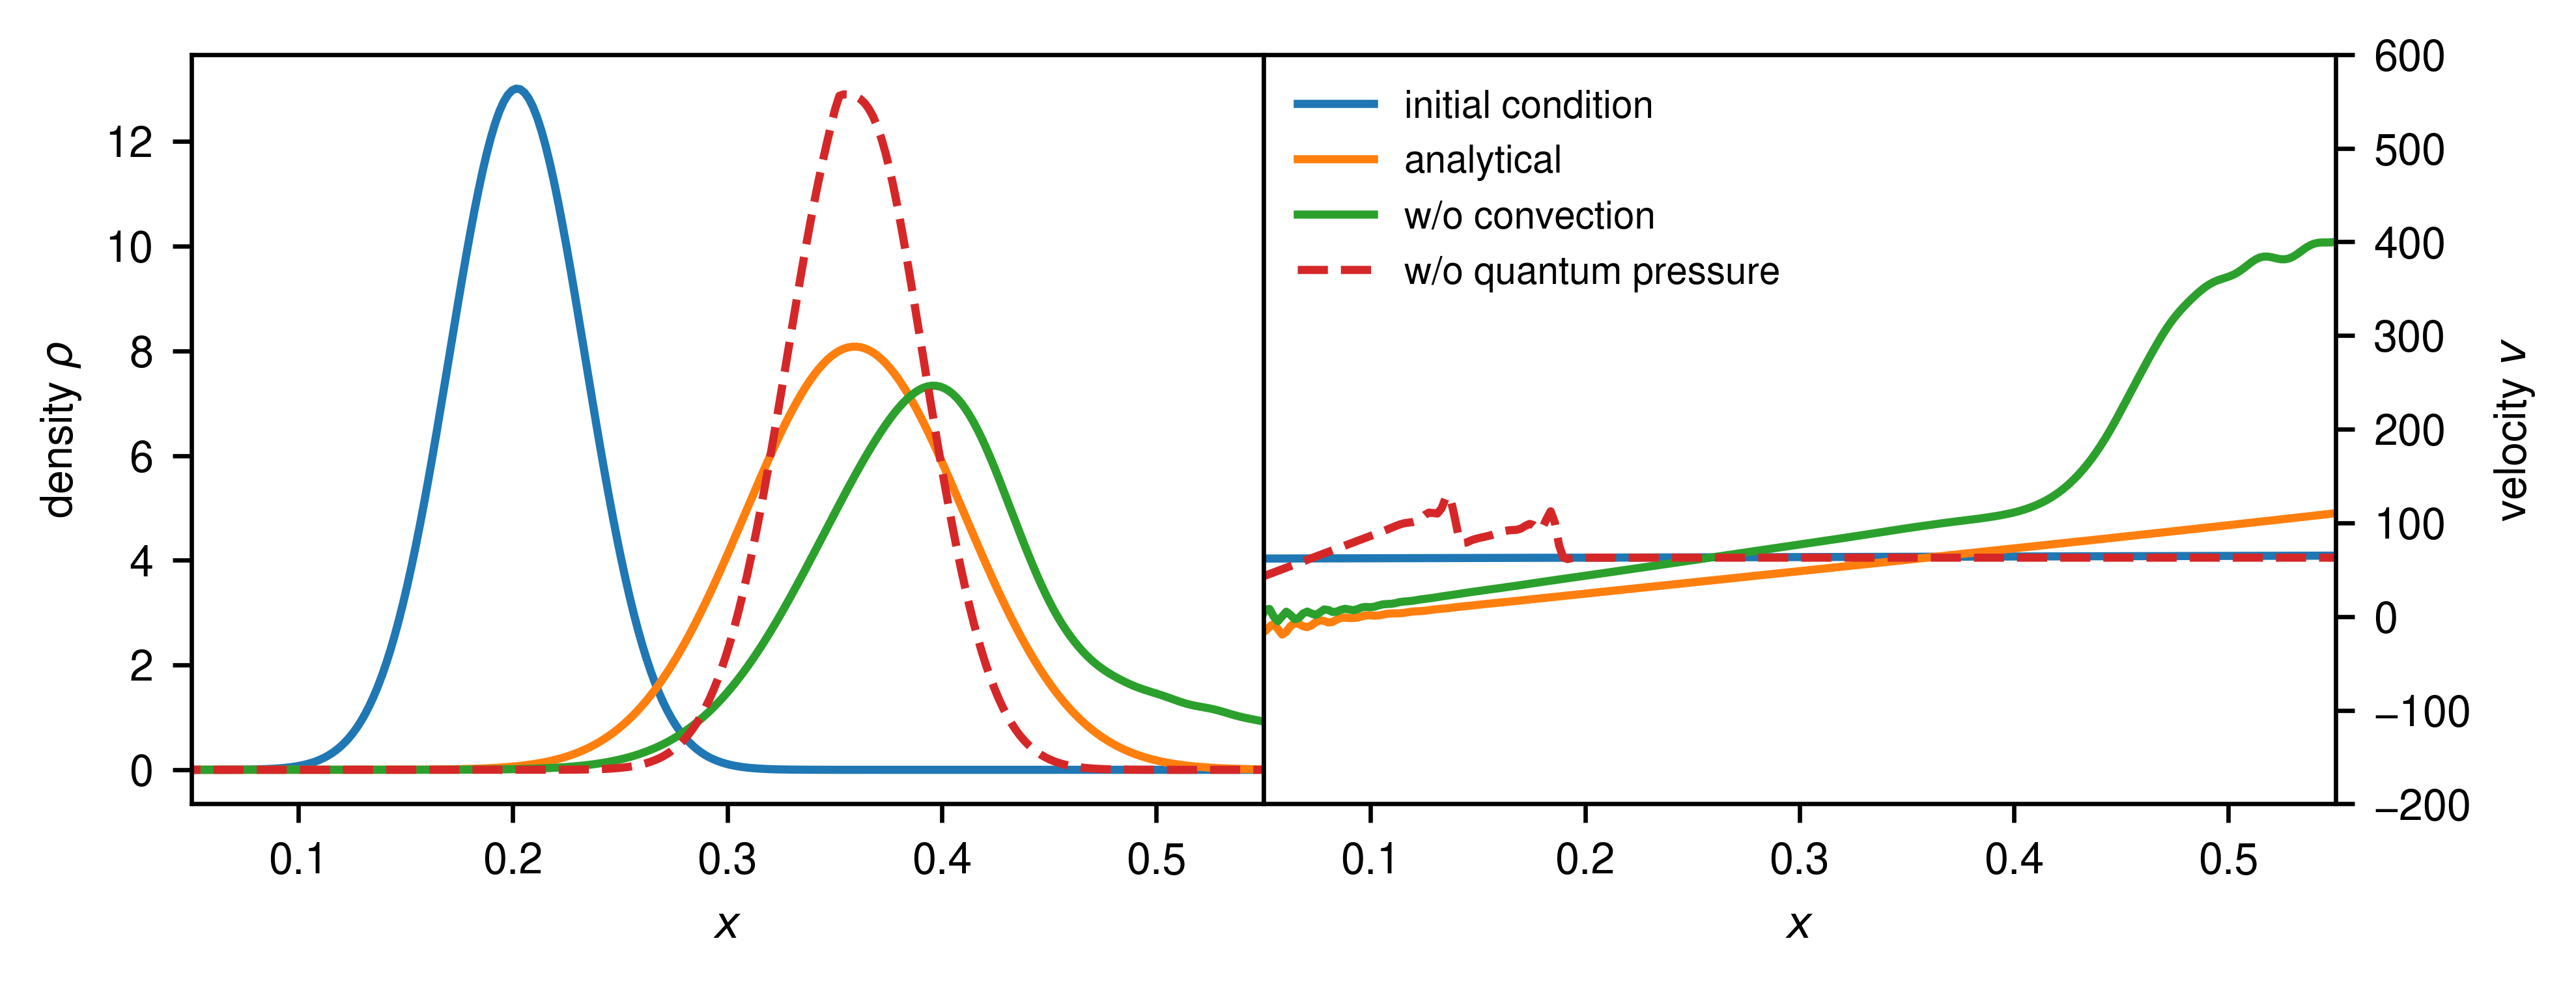

In [12]:
idx = 100
config0, psi0 , density0, phase0= animation.loadRun(f"runs/1d/travelling_wave_packet_ho-upwind/{0}.npz")
config1, psi1 , density1, phase1= animation.loadRun(f"runs/1d/travelling_wave_packet_ho-upwind/{idx}.npz")
config2, psi2 , density2, phase2= animation.loadRun(f"runs/1d/travelling_wave_packet_ho-upwind_without_convection/{idx}.npz")
config3, psi3 , density3, phase3= animation.loadRun(
    f"runs/1d/travelling_wave_packet_ho-upwind_without_diffusion/{idx}.npz"
    )
xx = np.linspace(0, config1["domainSize"], config1["resolution"])
dx = config1["domainSize"]/config1["resolution"]
print(config1["t0"], config1["tEnd"], config1["domainSize"])

fig, ax = plt.subplots(1, 2, figsize=(3.54 * 2, 2.54), dpi = 600)
plt.subplots_adjust(wspace=0.) 
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
plt.sca(ax[0])
plt.xlim(0.05, .55)
plt.plot(xx, density0[8:-8])
plt.plot(xx, density1[8:-8])
plt.plot(xx, density2[8:-8])
plt.plot(xx, density3[8:-8], ls = "dashed")
plt.xlabel("$x$")
plt.ylabel(r"density $\rho$")
plt.sca(ax[1])
plt.xlim(0.05, .55)
plt.ylim(-200, 600)
plt.plot(xx, getv(phase0, dx)[8:-8], label = "initial condition")
plt.plot(xx, getv(phase1, dx)[8:-8], label = "analytical")
plt.plot(xx, getv(phase2, dx)[8:-8], label = "w/o convection")
plt.plot(xx, getv(phase3, dx)[8:-8], label = "w/o quantum pressure", ls = "dashed")
plt.xlabel("$x$")
plt.ylabel(r"velocity $v$")
leg = plt.legend(loc="upper left",fontsize = 7)
leg.get_frame().set_linewidth(0.0)
plt.savefig("figures/travelling_gaussian.pdf", bbox_inches='tight')

1.2549999999999952 20 10


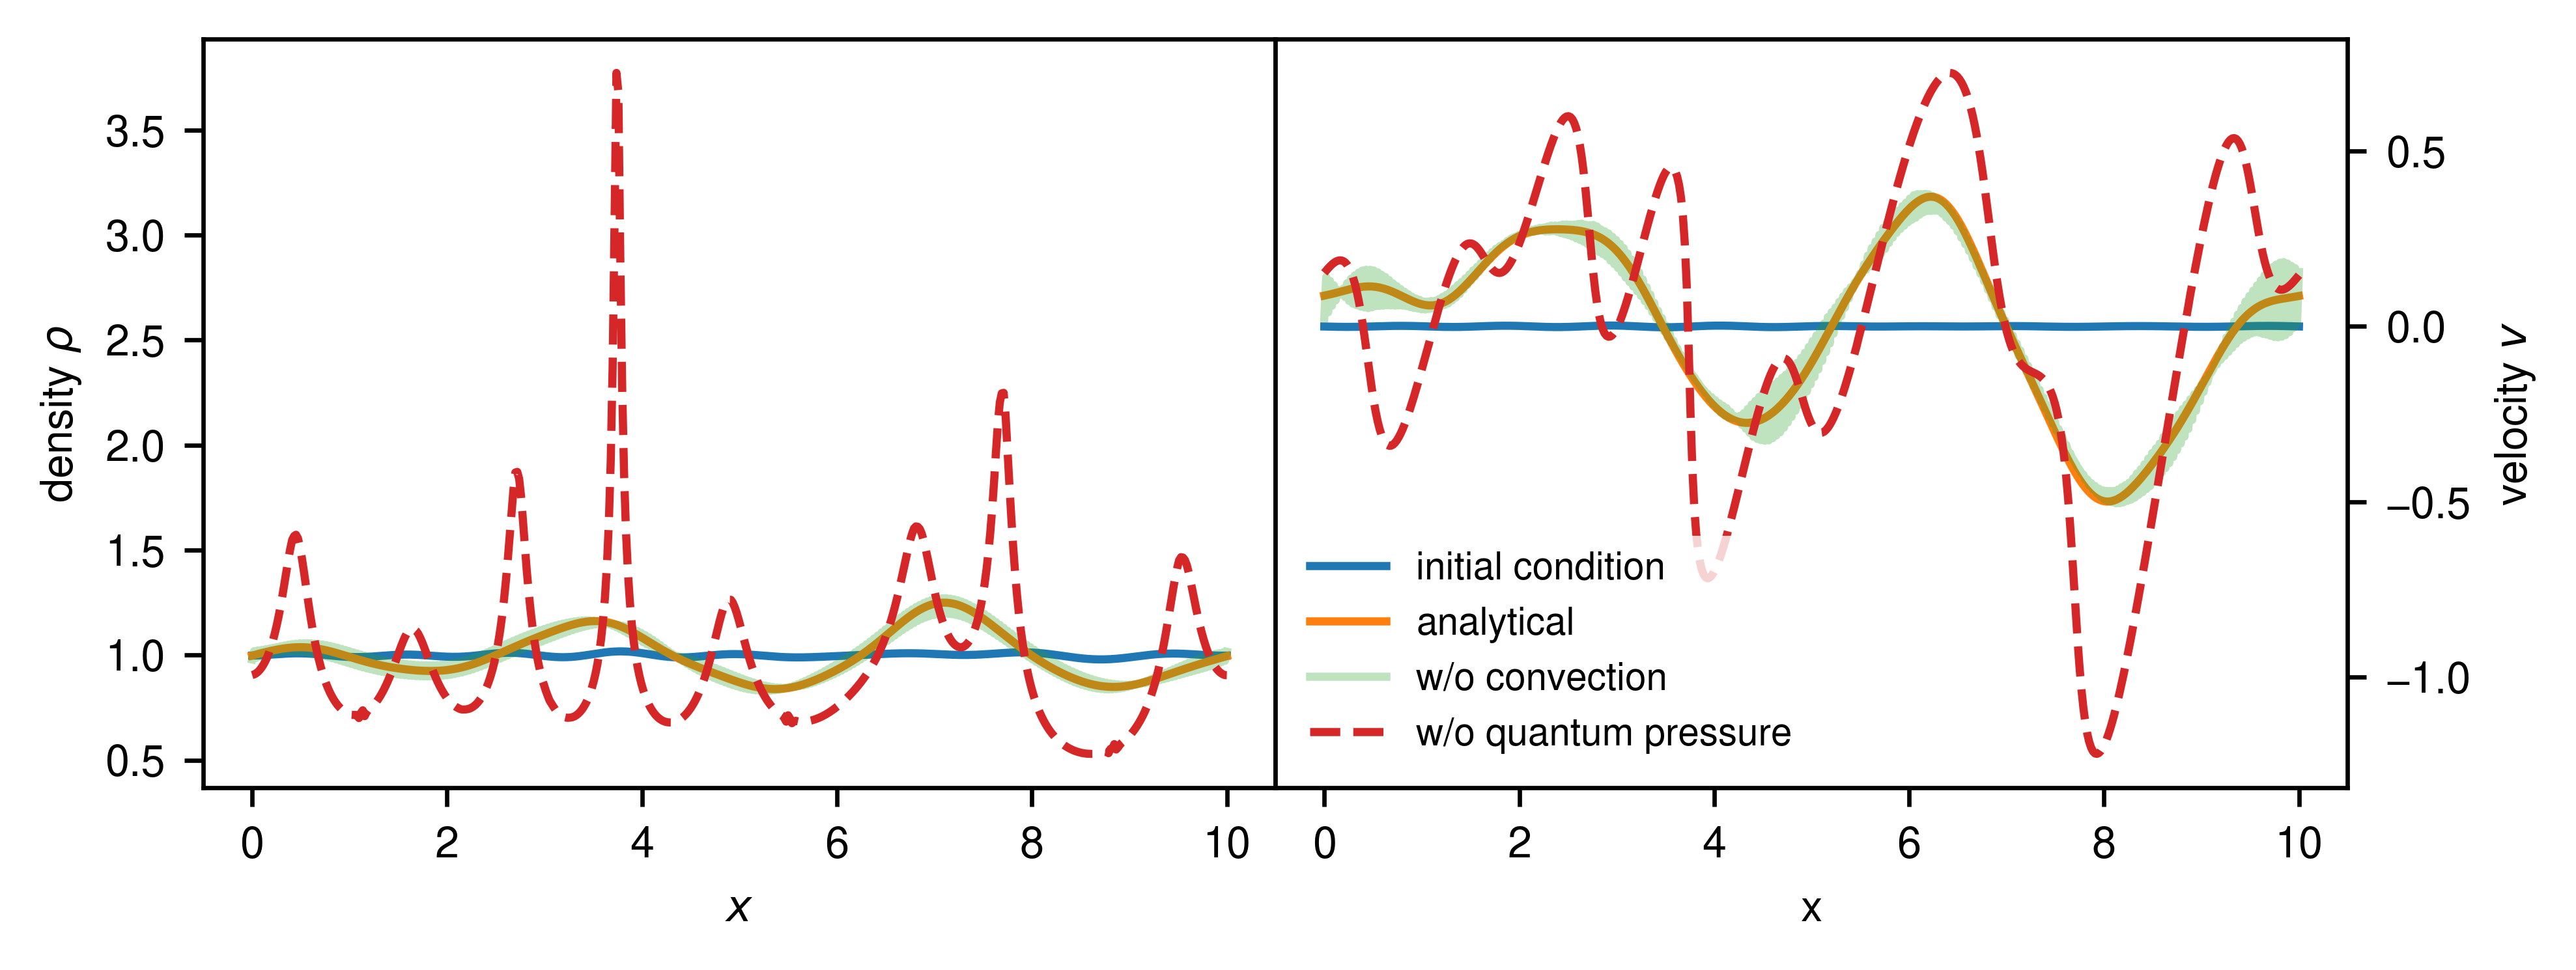

In [10]:
idx = 250
config0, psi0 , density0, phase0= animation.loadRun(f"runs/1d/soliton_spectral_(fft)/{0}.npz")
config1, psi1 , density1, phase1= animation.loadRun(f"runs/1d/soliton_spectral_(fft)/{idx}.npz")
config4, psi4 , density4, phase4= animation.loadRun(f"runs/1d/soliton_spectral_(fft)/{1000}.npz")
config2, psi2 , density2, phase2= animation.loadRun(f"runs/1d/soliton_ho-upwind_without_convection/{idx}.npz")
config3, psi3 , density3, phase3= animation.loadRun(f"runs/1d/soliton_ho-upwind_without_diffusion/{idx}.npz")
xx = np.linspace(0, config1["domainSize"], config1["resolution"])
dx = config1["domainSize"]/config1["resolution"]
print(config1["t0"], config1["tEnd"], config1["domainSize"])

fig, ax = plt.subplots(1, 2, figsize=(3.54 * 2, 2.54), dpi = 600)
plt.subplots_adjust(wspace=0.) 
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
plt.sca(ax[0])
#plt.xlim(0.05, .55)
plt.plot(xx, density0)
plt.plot(xx, density1)
#plt.plot(xx, density)
plt.plot(xx, density2, alpha = 0.3)
plt.plot(xx, density3, ls = "dashed")
plt.xlabel("$x$")
plt.ylabel(r"density $\rho$")
plt.sca(ax[1])
#plt.xlim(0.05, .55)
#plt.ylim(-200, 600)
plt.plot(xx, getv(phase0, dx), label = "initial condition")
plt.plot(xx, getv(phase1, dx), label = "analytical")
plt.plot(xx, getv(phase2, dx), label = "w/o convection", alpha =0.3)
plt.plot(xx, getv(phase3, dx), label = "w/o quantum pressure", ls = "dashed")
plt.xlabel("x")
plt.ylabel(r"velocity $v$")
leg = plt.legend(fontsize = 7)
leg.get_frame().set_linewidth(0.0)
plt.savefig("figures/soliton.pdf", bbox_inches='tight')


In [7]:
def setUpPlot():
    fig, ax = plt.subplots(1, 2, figsize=(3.54 * 2, 2.54), dpi = 600)
    plt.subplots_adjust(wspace=0.) 
    ax[1].yaxis.tick_right()
    ax[1].yaxis.set_label_position("right")
    plt.sca(ax[0])
    plt.xticks()
    plt.yticks()
    plt.xlabel("$x$")
    plt.ylabel(r"density $\rho$")
    plt.sca(ax[1])
    plt.xticks()
    plt.yticks()
    plt.xlabel("$x$")
    plt.ylabel("phase $S$")
    return fig, ax

## Gaussian wave packet

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.052499999999999894 0.25 4


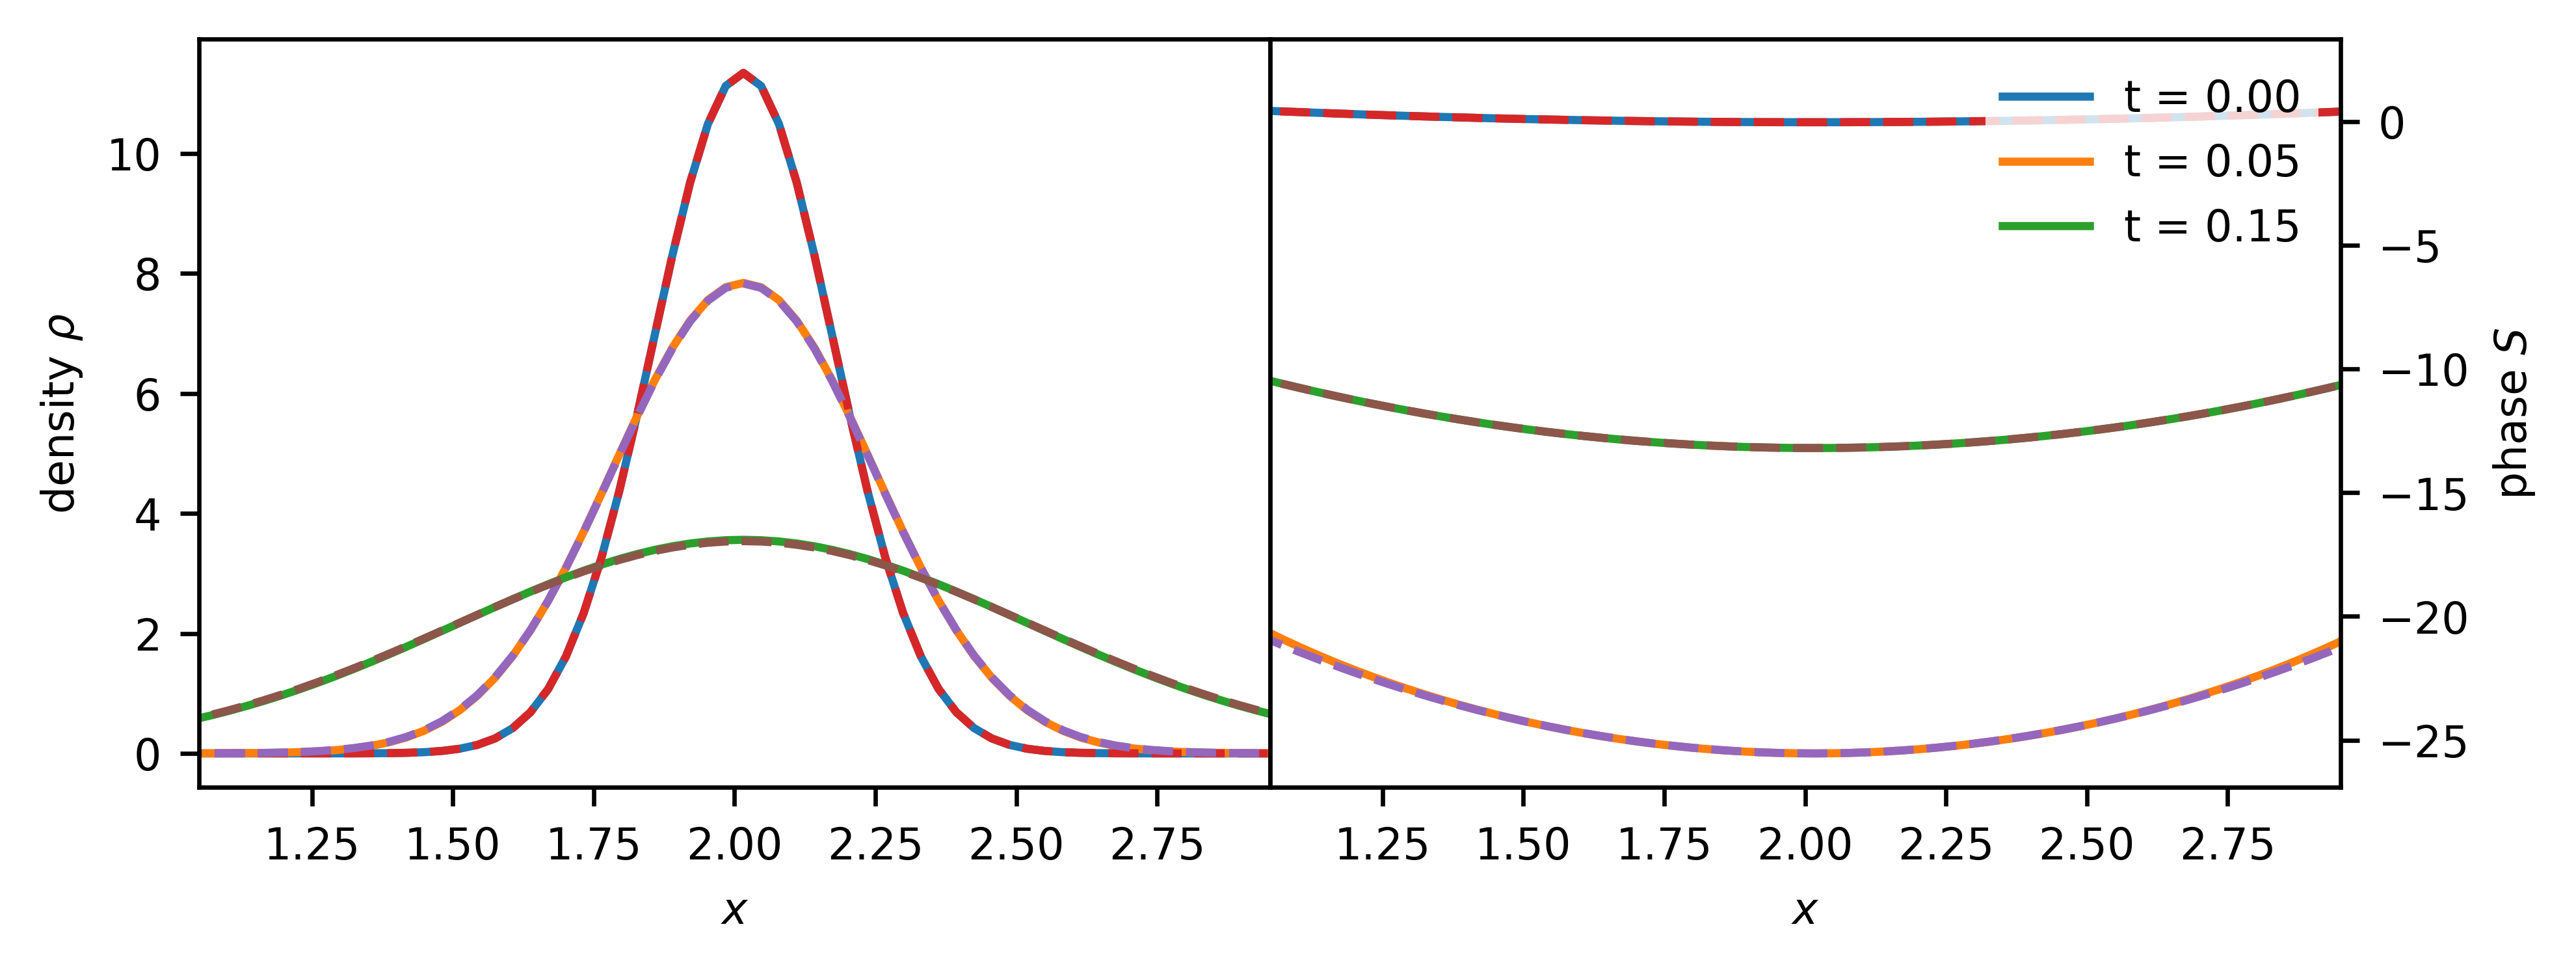

In [31]:
idx = 250
config0, psi0 , density0, phase0= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind/{0}.npz")
config1, psi1 , density1, phase1= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind/{20}.npz")
config2, psi2 , density2, phase2= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind/{60}.npz")
t1 = config0["t0"]
t2 = config1["t0"]
t3 = config2["t0"]
xx = np.linspace(0, config1["domainSize"], config1["resolution"])
dx = config1["domainSize"]/config1["resolution"]
print(config1["t0"], config1["tEnd"], config1["domainSize"])

fig, ax = setUpPlot()

plt.sca(ax[0])
#plt.xlim(0.05, .55)
plt.plot(xx, density0[8:-8])
plt.plot(xx, density1[8:-8])
plt.plot(xx, density2[8:-8])
plt.plot(xx, (np.abs(psi0)**2)[8:-8], ls = "dashed")
plt.plot(xx, (np.abs(psi1)**2)[8:-8], ls = "dashed")
plt.plot(xx, (np.abs(psi2)**2)[8:-8], ls = "dashed")
plt.xlim([1.05, 2.95])
plt.sca(ax[1])
plt.plot(xx, phase0[8:-8], label=f"t = {t1:.2f}")
plt.plot(xx, phase1[8:-8], label=f"t = {t2:.2f}")
plt.plot(xx, phase2[8:-8], label=f"t = {t3:.2f}")
plt.plot(xx, fd.make_continuous(np.angle(psi0))[8:-8], ls = "dashed")
plt.plot(xx, fd.make_continuous(np.angle(psi1))[8:-8], ls = "dashed")
plt.plot(xx, fd.make_continuous(np.angle(psi2))[8:-8], ls = "dashed")
plt.xlim([1.05, 2.95])
leg = plt.legend(loc="upper right")
leg.get_frame().set_linewidth(0.0)

In [26]:
config2

{'dimension': 1,
 'resolution': 128,
 'domainSize': 4,
 'usePeriodicBC': False,
 'ghostBoundarySize': 3,
 't0': 0.1275000000000014,
 'tEnd': 0.25,
 'dt': 0.001,
 'slowDown': 20,
 'fps': 20,
 'useAdaptiveTimestep': True,
 'cfl': 1,
 'maximumNumberOfTimesteps': 100000,
 'timeOrder': 2,
 'stencilOrder': 4,
 'fluxLimiter': 'MINMOD',
 'gravity': 0,
 'useCosmology': False,
 'nThreads': 4,
 'externalPotential': None,
 'debug': False,
 'outputTimestep': False,
 'useHybrid': False,
 'useAdaptiveSubregions': False,
 'subregions': [],
 'windowUpdateFrequency': 100,
 'WindowSize': 0.5,
 'mode': 0,
 'enoOrder': 1,
 'rhoOrder': 1,
 'modifiedPQN': 3,
 'xlim': [0, 4],
 'densityYlim': [0, 25],
 'phaseYlim': [-3.14, 3.14],
 'plotDensityLogarithm': True,
 'plotPhaseMod2': True,
 'dpi': 80,
 'artificialDiffusion': 1,
 'fluxMode': 0,
 'SPeriodicBoundary': True,
 'turnOffConvection': False,
 'turnOffQuantumPressure': False,
 'fluidMode': 0,
 'integrationOrigin': [0, 0],
 'useSlopeLimiting': False,
 'maxSpee

In [16]:
config0["tEnd"]

0.25